# **Project 2**, APS1070 Winter 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Feb 28, 11 PM - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Haocheng Wei
*   Student Number: 1008498261

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In [ ]:
%%shell
jupyter nbconvert --to html "/content/W22_APS1070_Project_2.ipynb"

##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]**
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?_____ **[0.1]**

In [1]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=022578a8bed8c688ed4146f87eb428029e0ccf2b1a7264a7bffbc90479b28d21
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [5]:
### YOUR CODE HERE ###
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


* There are 284807 rows.
* Time and Amount are the feature aside main features.
* Cloumn "Class" contains the target.
* Target value is a binary value indicates if the credit card is fraud (1) or not (0).

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**


In [6]:
### YOUR CODE HERE ###
# df.describe()
dataset_size = len(df)
neg_size = len(df[df['Class'] == 0])
pos_size = len(df[df['Class'] == 1])
print(neg_size / dataset_size, pos_size / dataset_size)

0.9982725143693799 0.001727485630620034


* The percentage of each class are: 
    * "0"(non fraud) : 99.83 %
    * "1"(fraud) : 0.17 %
* The dataset is considered extremely **unbalanced**. Because The number of data with "0" as their target has almost take up all the dataset. Only 0.17% of the data are of the other target.
* Because a unbalanced dataset is often deceitful. It may cause the machine learning model trained biased to predict almost every data as major classes.
    * The unbalanced data of this dataset may result in the KNN model that every testing data turns out to be '0'.
* Metrics include:
    * Do not take the whole dataset into sampling. Oversampling the minor classes, and Undersampling the major classes instead.
    * Use generative models to implement **data augmentation**.
    * Consider the data as an **anormaly detect model** and use corresponding classifier.
    * Use **cost sensitive** methods.

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [7]:
### Split the data ###
from sklearn.model_selection import train_test_split
X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

## Split data and label
columns = df.columns
data = df.loc[:, columns[0:-1]]
label = df.loc[:, columns[-1]]
print(data.shape, label.shape)

## Split train and test
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.15, random_state=40)

## Split train and val
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=40)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(284807, 30) (284807,)
(205772, 30) (36313, 30) (42722, 30) (205772,) (36313,) (42722,)


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [8]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
PLOT = False
if PLOT:
    nplots=np.size(features)
    plt.figure(figsize=(15,4*nplots))
    gs = gridspec.GridSpec(nplots,1)
    for i, feat in enumerate(features):
        ax = plt.subplot(gs[i])
        sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
        sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
        ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
        ax.set_xlabel('')
        ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

Fraudent and non-fraudent data appear in different distribution in almost every dimensions. Using GMM model allows us to fit these distributions with single or multiple bell curves in each dimension.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


### a. Fitting regardless of the class

In [9]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import roc_auc_score
features = features

def sqz(x):  # squeeze array
    return x.to_numpy().reshape(-1, 1)

def fitGaussian(x, n=1, squeeze=True):  # Step1
    if squeeze == True:
        x = sqz(x)
    return GMM(n_components=n, random_state=0).fit(x)

def auc(x, y, model, squeeze=True):  # Step2
    if squeeze == True:
        x = sqz(x)
    p = model.score_samples(x)
    return roc_auc_score(y, -1 * p)


auc_train, auc_val = [], []
for i, feat in enumerate(features):
    model = fitGaussian(X_train[feat])
    auc_train.append(auc(X_train[feat], y_train, model))
    auc_val.append(auc(X_val[feat], y_val, model))
res2a3 = pd.DataFrame(data={'Feature': features,
                            'train auc': auc_train, 
                            'val auc': auc_val
                            })
res2a3

,Feature,train auc,val auc
0,V1,0.693106,0.727285
1,V2,0.843111,0.884128
2,V3,0.861127,0.899980
3,V4,0.886927,0.895859
4,V5,0.759760,0.801464
5,V6,0.725738,0.730180
6,V7,0.864883,0.904070
7,V8,0.771059,0.821291
8,V9,0.793499,0.824060
9,V10,0.908675,0.929600


In [10]:
from math import inf
def findMaxNof(arr, n=3):  # step4
    tmp = [i for i in arr]  # hard copy
    maxnum, maxind = [], []
    for i in range(3):
        num = max(tmp)
        index = tmp.index(num)
        maxnum.append(num)
        maxind.append(index)
        tmp[index] = -inf
    return maxnum, maxind

maxauc, maxv = findMaxNof(auc_val, n=3)
maxv = [features[i] for i in maxv]
res2a4 = pd.DataFrame(data={'Largest AUC': maxauc,
                            'Feature': maxv})
res2a4

,Largest AUC,Feature
0,0.974939,V14
1,0.953239,V17
2,0.935048,V12


In [11]:
from numpy.lib.function_base import median
from sklearn.metrics import f1_score

def sig(x, t):
    return 1 if x < t else 0

def listSig(l, t):
    return [sig(i, t) for i in l]

def getLogIndex(maxlen):
    res, i = [0], 1
    while i < maxlen:
        i = i * 2
        res.append(i)
    return res

def maxF1fromSamp(s, y0, stride=100, t=0):
    all_score = list(set(s))
    all_score.sort()
    f1r, f1 = [], []
 
    for i in getLogIndex(len(all_score))[:-1]:     # raw threshold # applied a new nlogn method
        yp = listSig(s, all_score[i])
        f = f1_score(y0, yp)
        #print(i, f)
        f1r.append(f)
    raw_max = max(f1r)
    raw_index = f1r.index(raw_max)

    pres_l = max(0, raw_index - stride)
    pres_r = min(len(all_score), raw_index + stride)
    for i in range(pres_l, pres_r):     # pres threshold
        yp = listSig(s, all_score[i])
        f = f1_score(y0, yp)
        f1.append(f)
    return max(f1), all_score[f1.index(max(f1))]

maxf1s, maxt = [], []
for v in maxv:
    model = fitGaussian(X_train[v])
    sampscr = model.score_samples(sqz(X_val[v]))
    f1, t = maxF1fromSamp(sampscr, y_val)
    maxf1s.append(f1)
    maxt.append(t)
res2a5 = pd.DataFrame(data={'Feature': maxv,
                            'F1-score': maxf1s,
                            'Threshold': maxt})
res2a5

,Feature,F1-score,Threshold
0,V14,0.666667,-15.165529
1,V17,0.603774,-22.344896
2,V12,0.701754,-10.169736


In [12]:
from sklearn.metrics import precision_recall_fscore_support
prfs = []
for i in range(3):
    model = fitGaussian(X_train[maxv[i]])
    sampscr = model.score_samples(sqz(X_val[maxv[i]]))
    yp = listSig(sampscr, maxt[i])
    prfs.append(precision_recall_fscore_support(y_val, yp, average='binary'))
prfs = np.array(prfs).transpose()
res2a6 = pd.DataFrame(data={'Feature': maxv, 'Threshold':maxt, 
                            'Precision':prfs[0], 'Recall':prfs[1], 'F1-score':prfs[2]})
res2a6

,Feature,Threshold,Precision,Recall,F1-score
0,V14,-15.165529,0.613333,0.730159,0.666667
1,V17,-22.344896,0.744186,0.507937,0.603774
2,V12,-10.169736,0.784314,0.634921,0.701754


**a.7:**
    
The complexity of my method is $O(n\log n)$, which runs for 16 secs in a.5


### b. Fitting based on class

In [55]:
# non fraudulent, which is 0, compute AUC, F1 score, Precision and Recall
def getBinIndex(y, c=1):  # c=1 mark fraud, c=0 mark nonfraud
    res = []
    for i in range(len(y)):  # not so pandas, need rework
        if y.iloc[i] == c:
            res.append(y.index[i])
    return res

def washXy(x, y, c=1): 
    ind = getBinIndex(y, c=c)
    return x.drop(ind), y.drop(ind)

maxv = maxv
prfs2, auc_train2, auc_val2, maxt2 = [], [], [], []
# Wash dataset
neg_X_train, neg_y_train = washXy(X_train, y_train, c=1)

for v in maxv:
    model = fitGaussian(neg_X_train[v])
    auc_train2.append(auc(X_train[v], y_train, model))
    auc_val2.append(auc(X_val[v], y_val, model))
    sampscr = model.score_samples(sqz(X_val[v]))
    _, t = maxF1fromSamp(sampscr, y_val)
    maxt2.append(t)
    yp = listSig(sampscr, t)
    prfs2.append(precision_recall_fscore_support(y_val, yp, average='binary'))
prfs2 = np.array(prfs2).transpose()[0:-1]

In [14]:
res2b = pd.DataFrame(data={'Feature': maxv, 'train auc': auc_train2, 'val auc': auc_val2, 'Threshold':maxt2, 'Precision':prfs2[0], 'Recall':prfs2[1],'F1 Score':prfs2[2]})
res2b

,Feature,train auc,val auc,Threshold,Precision,Recall,F1 Score
0,V14,0.945558,0.974871,-17.097735,0.613333,0.730159,0.666667
1,V17,0.923220,0.952849,-27.969116,0.744186,0.507937,0.603774
2,V12,0.903241,0.935970,-11.109495,0.784314,0.634921,0.701754


In [15]:
# the table in part2a:
res2ba3 = res2a3.iloc[[13,16,11]]
res2ba3.index = [0,1,2]
res2ba6 = res2a6.iloc[:, 1:]
res2ba = pd.concat([res2ba3, res2ba6], axis=1)
res2ba

,Feature,train auc,val auc,Threshold,Precision,Recall,F1-score
0,V14,0.945320,0.974939,-15.165529,0.613333,0.730159,0.666667
1,V17,0.923754,0.953239,-22.344896,0.744186,0.507937,0.603774
2,V12,0.902476,0.935048,-10.169736,0.784314,0.634921,0.701754


* From the Table we can see that there are very slight differences in part2 a and part 2 b.

* Because the samples are unbalanced. The fraud samples are too few that it can hardly affect the training of GMM (in a single feature). Therefore, by washing off the fraud samples, the result does not changed much.

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




### a. 2D Plot Visualization

In [16]:
feat3a = pd.DataFrame(data={'Feature':features}).sample(n=8, replace=False, random_state=40)
feat3a                                                                           # first 2 for step 1 and last 3 for step 7

,Feature
2,V3
16,V17
19,V20
14,V15
15,V16
13,V14
20,V21
3,V4


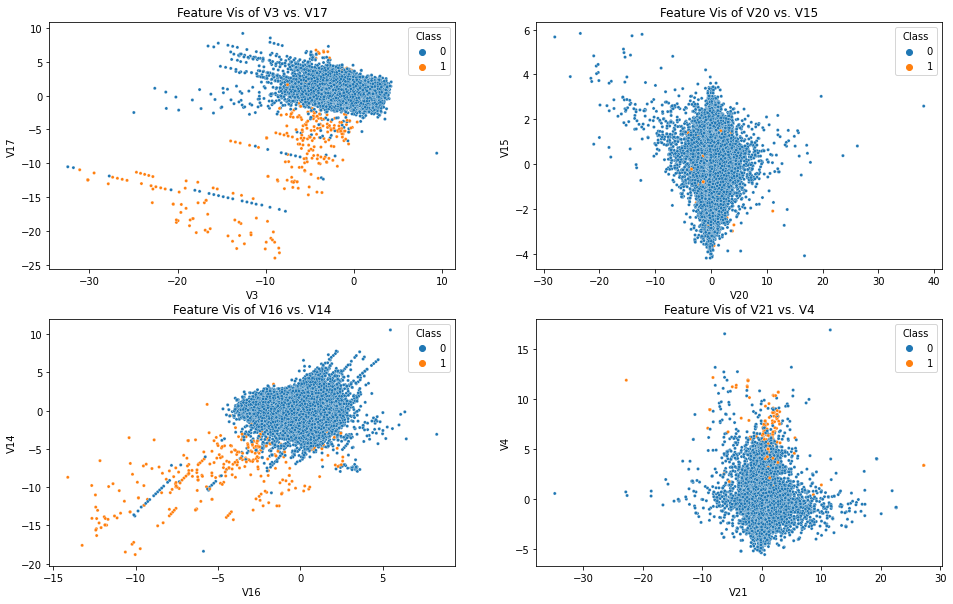

In [17]:
# Step 2 & 3
fig3a = plt.figure(figsize=(16,10))
ax3a = fig3a.subplots(2, 2)
for i in range(4):
    f1 = feat3a.iloc[2 * i, 0]
    f2 = feat3a.iloc[2 * i + 1, 0]                                       

    dat3a = pd.concat([X_train.loc[:, [f1, f2]], y_train], axis=1)
    plot3a = sns.scatterplot(data=dat3a, x=f1, y=f2, hue="Class", s=10, ax=ax3a[i // 2, i % 2])
    plot3a.set(title='Feature Vis of {} vs. {}'.format(f1, f2), xlabel=f1, ylabel=f2)

In [18]:
auc_train3, auc_val3 = [], []
nocs = [3, 3, 4, 4]
for i in range(4):
    f1 = feat3a.iloc[2 * i, 0]
    f2 = feat3a.iloc[2 * i + 1, 0]
    
    model = fitGaussian(X_train.loc[:,[f1, f2]], n=nocs[i], squeeze=False)

    auc_train3.append(auc(X_train.loc[:,[f1, f2]], y_train, model, squeeze=False))
    auc_val3.append(auc(X_val.loc[:,[f1, f2]], y_val, model, squeeze=False))

In [19]:
res3a1 = pd.DataFrame(data={'Train AUC': auc_train3, 'Val AUC': auc_val3,
                            'Feature 1': feat3a.iloc[[0,2,4,6], 0].to_numpy(),
                            'Feature 2': feat3a.iloc[[1,3,5,7], 0].to_numpy(),
                            'Components': nocs})
res3a1

,Train AUC,Val AUC,Feature 1,Feature 2,Components
0,0.936893,0.979934,V3,V17,3
1,0.729441,0.788702,V20,V15,3
2,0.945162,0.981102,V16,V14,4
3,0.907962,0.945759,V21,V4,4


The highest AUC is from set(0), which is of V10 and V26.

Therefore we are going to optimize the F1-Score using set(0) from above.

In [20]:
# Step 9
f1 = 'V16'
f2 = 'V14'
X_train_3a2 = X_train.loc[:, [f1, f2]]
X_val_3a2 = X_val.loc[:, [f1, f2]]

model = fitGaussian(X_train_3a2, n=3, squeeze=False)
sampscr = model.score_samples(X_val_3a2)
f1s, t = maxF1fromSamp(sampscr, y_val, stride=200)
print('Optimized F1-score={},  Threshold={}'.format(f1s, t))

Optimized F1-score=0.6115702479338844,  Threshold=-10.021655418128928


In [21]:
# Step 10 Plot two seperate figures 
# (one for the training data and one for the validation data) 
# similar to step 3 and put a circle around outliers based on your threshold 
# (use the code of the similar figure in tutorial) [0.25]
def findOutliers(scr, t):
    ind = []
    for i in range(len(scr)):
        if scr[i] < t:
            ind.append(i)
    return ind
                                  

dat3a2xt = pd.concat([X_train_3a2, y_train], axis=1)
dat3a2xv = pd.concat([X_val_3a2, y_val], axis=1)

sampscr = model.score_samples(X_val_3a2)
outliersv = findOutliers(sampscr, t)
dat3a2xvo = dat3a2xv.iloc[outliersv]

sampscr = np.array(model.score_samples(X_train_3a2))
outlierst = findOutliers(sampscr, t)
dat3a2xto = dat3a2xt.iloc[outlierst]

[Text(0, 0.5, 'V14'),
 Text(0.5, 0, 'V16'),
 Text(0.5, 1.0, 'Feature Vis of V16 vs. V14 in Validation Set')]

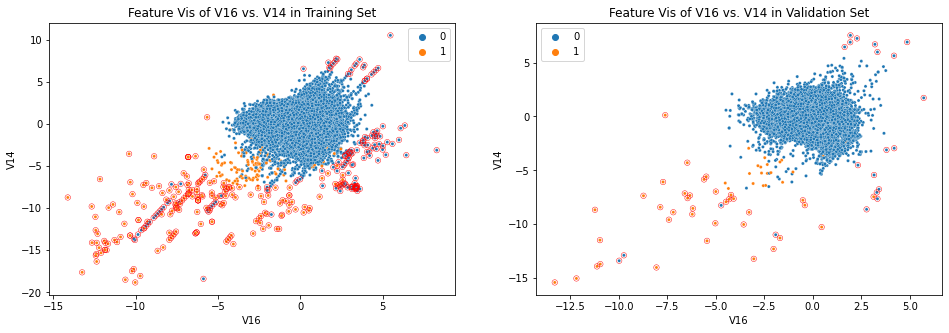

In [22]:
fig3a2 = plt.figure(figsize=(16,5))
ax3a2 = fig3a2.subplots(1, 2)   
plot3a = sns.scatterplot(data=dat3a2xt, x=f1, y=f2, hue="Class", s=10, ax=ax3a2[0])
plot3a = sns.scatterplot(data=dat3a2xto, x=f1, y=f2, marker="o", facecolor="none", edgecolor="r", s=30, ax=ax3a2[0])
plot3a.set(title='Feature Vis of {} vs. {} in Training Set'.format(f1, f2), xlabel=f1, ylabel=f2)
plot3a = sns.scatterplot(data=dat3a2xv, x=f1, y=f2, hue="Class", s=10, ax=ax3a2[1])
plot3a = sns.scatterplot(data=dat3a2xvo, x=f1, y=f2, marker="o", facecolor="none", edgecolor="r", s=30, ax=ax3a2[1])
plot3a.set(title='Feature Vis of {} vs. {} in Validation Set'.format(f1, f2), xlabel=f1, ylabel=f2)

###b. 3D Plot Visualization

In [23]:
f1, f2, f3 = maxv[0], maxv[1], maxv[2]
print(f1, f2, f3)

V14 V17 V12


In [24]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2, f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


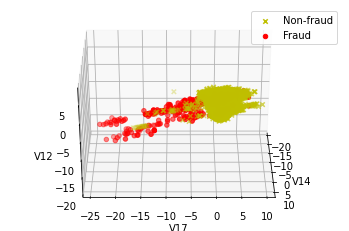

In [25]:
plot_3d(X_train, y_train, f1=f1, f2=f2, f3=f3, angle=0 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

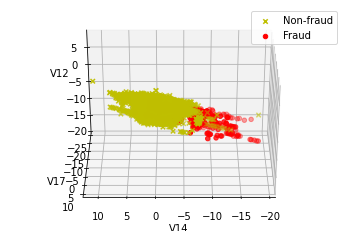

In [26]:
plot_3d(X_train, y_train, f1=f1, f2=f2, f3=f3, angle=90 )

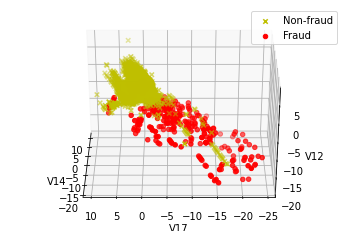

In [27]:
plot_3d(X_train, y_train, f1=f1, f2=f2, f3=f3, angle=180 )

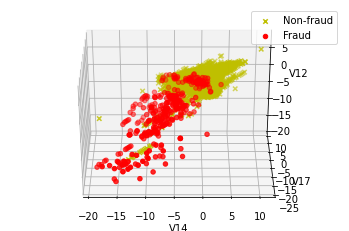

In [28]:
plot_3d(X_train, y_train, f1=f1, f2=f2, f3=f3, angle=270 )

In [29]:
X_train_3f = pd.DataFrame(data = X_train, columns=[f1, f2, f3])
X_val_3f = pd.DataFrame(data = X_val, columns=[f1, f2, f3])

model = fitGaussian(X_train_3f, n=5, squeeze=False)
auc_train3f = auc(X_train_3f, y_train, model, squeeze=False)
auc_val3f = auc(X_val_3f, y_val, model, squeeze=False)

print(auc_train3f, auc_val3f)

0.9514183380820274 0.9843476737821565


In [30]:
sampscr = model.score_samples(X_val_3f)
f1s, t = maxF1fromSamp(sampscr, y_val, stride=200)
print('Optimized F1-score={},  Threshold={}'.format(f1s, t))

Optimized F1-score=0.5128205128205129,  Threshold=-12.815623641268557


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [57]:
### YOUR CODE HERE ###
neg_x_train, neg_y_train = washXy(X_train, y_train, c=1)
pos_x_train, pos_y_train = washXy(X_train, y_train, c=0)
print(neg_x_train.shape, pos_x_train.shape)

(205411, 30) (361, 30)


In [63]:
def _af(s1, s2, c):  # single activate function for 4.4
    if s1 < c * s2:
        return 1
    else:
        return 0

def af(s1, s2, c):  # List type activate function
    res = []
    for i in range(len(s1)):
        res.append(_af(s1[i], s2[i], c))
    return res

def maxF1withC(s1, s2, y0, step=0.1, limc=[0, 10]):
    # init
    allcs, i = [], limc[0]
    while i < limc[1]:
        allcs.append(i)
        i += step
    allcs = [round(i, 2) for i in allcs]
    f1 = []

    # loop
    for c in allcs:
        yp = af(s1, s2, c)
        # prfs.append(precision_recall_fscore_support(y0, yp, average='binary')[0:-1])
        f1.append(f1_score(y0, yp))

    # find max f1
    maxf = max(f1)
    maxc = allcs[f1.index(maxf)]
    # find precision and recall at this time:
    yp = af(s1, s2, maxc)
    prfs = precision_recall_fscore_support(y0, yp, average='binary')
    maxp, maxr = prfs[0], prfs[1]
    return [maxp, maxr, maxf, maxc]

## init
RANGE = [0, 10]
STEP = 0.1
maxprfc = []

In [64]:
## loop
for v in features:
    # Step 1 & 2
    g1 = fitGaussian(neg_x_train[v])
    g2 = fitGaussian(pos_x_train[v])

    # Step 3
    s1 = g1.score_samples(sqz(X_val[v]))
    s2 = g2.score_samples(sqz(X_val[v]))

    # Step 4 find optimal C
    maxprfc.append(maxF1withC(s1, s2, y_val))

In [68]:
prfct = np.array(maxprfc).transpose()
res4 = pd.DataFrame(data={'Feature': features, 'Precision': prfct[0], 'Recall': prfct[1], 'F1-Score': prfct[2], 'C':prfct[3]})
res4

,Feature,Precision,Recall,F1-Score,C
0,V1,0.131579,0.158730,0.143885,6.5
1,V2,0.800000,0.126984,0.219178,5.7
2,V3,0.413043,0.301587,0.348624,7.5
3,V4,0.333333,0.460317,0.386667,4.1
4,V5,0.244444,0.174603,0.203704,8.3
5,V6,0.079646,0.285714,0.124567,1.8
6,V7,0.231884,0.253968,0.242424,9.6
7,V8,0.104478,0.111111,0.107692,10.0
8,V9,0.758621,0.349206,0.478261,3.4
9,V10,0.489362,0.365079,0.418182,6.8


5. From the Table above, we can see that the feature V14 got the best F1-score of 0.71 at c=7.0 The corresponding precision, recall are 0.70, 0.73.

6. Can we report AUC?

    In my opinion, although it is unable to calc AUC via the function we used in previous parts because we have multiple `sample_score`s this time, we can still calculate the AUC of the model since we are absolutely able to get the prediction and the ground truth, which means the TPR and FPR at each point are given and hence the AUC.

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and **report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model.** What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [112]:
### YOUR CODE HERE ###
# Build Models: GMM only, rand 10 n_components from [1,2,3,4,5], rand features from 2~28
np.random.seed(42)
NUM_MODELS = 30
ncomps = np.random.randint(4, size=NUM_MODELS) + 2
print(ncomps)
feats = []
for i in range(NUM_MODELS):
    np.random.seed(42 * i)
    feats.append(list(np.random.choice(features, np.random.randint(8, size=1)[0] + 1, replace=False)))
print(feats)

[4 5 2 4 4 5 2 2 4 3 4 4 4 4 5 2 5 5 5 4 3 2 3 5 5 3 3 3 5 5]
[['V3', 'V21', 'V24', 'V14', 'V12'], ['V28', 'V17', 'V13', 'V23', 'V9', 'V10', 'V22'], ['V7', 'V17', 'V13'], ['V8', 'V12', 'V13', 'V9', 'V26', 'V6', 'V23'], ['V4', 'V23', 'V22', 'V3', 'V18', 'V1'], ['V11', 'V14', 'V1'], ['V12', 'V3', 'V1', 'V9'], ['V23', 'V3', 'V21'], ['V4', 'V13', 'V12', 'V28'], ['V12', 'V21', 'V2', 'V14', 'V5'], ['V10', 'V8'], ['V27'], ['V18', 'V19', 'V26', 'V14', 'V3', 'V28', 'V17', 'V21'], ['V12', 'V1', 'V4', 'V13', 'V16'], ['V10', 'V8', 'V7', 'V13', 'V22', 'V5', 'V4', 'V16'], ['V24'], ['V22', 'V7', 'V14', 'V13', 'V24', 'V9', 'V10', 'V11'], ['V2', 'V24', 'V16', 'V21', 'V17', 'V14', 'V13', 'V9'], ['V26', 'V12'], ['V3', 'V26', 'V15', 'V10', 'V1'], ['V26', 'V24'], ['V26'], ['V8', 'V20', 'V28', 'V25', 'V2', 'V14'], ['V20', 'V21', 'V16'], ['V23'], ['V11', 'V21', 'V25', 'V22', 'V14'], ['V27'], ['V15', 'V28', 'V19', 'V14', 'V11'], ['V28', 'V25'], ['V13', 'V8', 'V6', 'V9', 'V3', 'V2', 'V12', 'V21']]


In [113]:
models = []
for i in range(NUM_MODELS):
    model = GMM(n_components=ncomps[i], random_state=42).fit(X_train[feats[i]])
    models.append(model)

This could take several minutes if the number of model is large. Please wait.

In [114]:
auct5, aucv5 = [], []

for i in range(NUM_MODELS):
    model = models[i]
    feat = feats[i]
    auct5.append(auc(X_train[feat], y_train, model, squeeze=False))
    aucv5.append(auc(X_val[feat], y_val, model, squeeze=False))

print(auct5, aucv5)

[0.9488620820758102, 0.9398325937198457, 0.9383870626731183, 0.903274727726134, 0.9275093373705156, 0.9511587005262377, 0.9072779172776919, 0.883076536061995, 0.9258343224881848, 0.9520933714530658, 0.9026936347910604, 0.8187048030493449, 0.9525761411440081, 0.9388034564200729, 0.9462788684279775, 0.4837388174841033, 0.9493751807992654, 0.9483186543198421, 0.8961497380881038, 0.9147825120452042, 0.4746459469792681, 0.49357745314100426, 0.943468220750207, 0.903588428906354, 0.685663878989399, 0.9543522977532607, 0.8165640102861946, 0.9554027692146322, 0.7928193985948393, 0.9146088854139888] [0.9847303776683087, 0.9682942528735632, 0.9581429666119321, 0.9416932676518883, 0.9560499178981938, 0.9792091954022989, 0.958656157635468, 0.950688560481664, 0.938625068418172, 0.9777423097974822, 0.9345860974274768, 0.8623076081007115, 0.9747231527093595, 0.9539748221127531, 0.9673637657361795, 0.49323787629994525, 0.9658679802955664, 0.9726213464696223, 0.9205779967159278, 0.9566765188834154, 0.50

In [115]:
def ftpr(sc, y0):
    f, t = maxF1fromSamp(sc, y0)
    yp = listSig(sc, t)
    s = precision_recall_fscore_support(y0, yp, average='binary')
    p, r = s[0], s[1]
    return [f, t, p, r]

res5ftpr = []
for i in range(NUM_MODELS):
    model = models[i]
    feat = feats[i]
    scr = model.score_samples(X_val[feat])
    res5ftpr.append(ftpr(scr, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
f_nums = [len(i) for i in feats]
featstr = [str(i) for i in feats]
res5t = np.array(res5ftpr).transpose()
res5 = pd.DataFrame(data={
    'Num of Features': f_nums,
    'Features Used': featstr,
    'Num of Components': ncomps,
    'Train AUC': auct5,
    'Val AUC': aucv5,
    'Threshold': res5t[1],
    'F1-Score': res5t[0],
    'Precision': res5t[2],
    'Recall': res5t[3]})
res5

,Num of Features,Features Used,Num of Components,Train AUC,Val AUC,Threshold,F1-Score,Precision,Recall
0,5,"['V3', 'V21', 'V24', 'V14', 'V12']",4,0.948862,0.984730,-18.275919,0.387879,0.313725,0.507937
1,7,"['V28', 'V17', 'V13', 'V23', 'V9', 'V10', 'V22']",5,0.939833,0.968294,-23.667863,0.317460,0.317460,0.317460
2,3,"['V7', 'V17', 'V13']",2,0.938387,0.958143,-16.950089,0.442308,0.560976,0.365079
3,7,"['V8', 'V12', 'V13', 'V9', 'V26', 'V6', 'V23']",4,0.903275,0.941693,-32.050479,0.296296,0.355556,0.253968
4,6,"['V4', 'V23', 'V22', 'V3', 'V18', 'V1']",4,0.927509,0.956050,-21.247356,0.343558,0.280000,0.444444
5,3,"['V11', 'V14', 'V1']",5,0.951159,0.979209,-15.828703,0.424779,0.480000,0.380952
6,4,"['V12', 'V3', 'V1', 'V9']",2,0.907278,0.958656,-33.830522,0.391304,0.620690,0.285714
7,3,"['V23', 'V3', 'V21']",2,0.883077,0.950689,-30.853743,0.197802,0.321429,0.142857
8,4,"['V4', 'V13', 'V12', 'V28']",4,0.925834,0.938625,-13.345264,0.307692,0.245283,0.412698
9,5,"['V12', 'V21', 'V2', 'V14', 'V5']",3,0.952093,0.977742,-23.722592,0.358621,0.317073,0.412698


* In general, the model performs better when applying more features on them. 
* The number of components should be neither too large nor too small, best around 4.
* The GMM model works better in combination of two 
* V10, V12, V14, V17 are among the best features.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


Using the 2-GMM Model in part 4 with single feature 'V14' at c=7.0

In [117]:
### YOUR CODE HERE ###
## Recover the model from part 4
v = 'V14'
c = 7.0
print("training GMMs..........")
neg_x_train, neg_y_train = washXy(X_train, y_train, c=1)
pos_x_train, pos_y_train = washXy(X_train, y_train, c=0)
g1 = fitGaussian(neg_x_train[v])
g2 = fitGaussian(pos_x_train[v])
print("Testing................")
s1 = g1.score_samples(sqz(X_test[v]))
s2 = g2.score_samples(sqz(X_test[v]))
yp = af(s1, s2, c)
prfs = precision_recall_fscore_support(y_test, yp, average='binary')
print('Precision:{}'.format(prfs[0]))
print('Recall:{}'.format(prfs[1]))
print('F1-Score:{}'.format(prfs[2]))

training GMMs..........
Testing................
Precision:0.618421052631579
Recall:0.6911764705882353
F1-Score:0.6527777777777778
